In [ ]:
import sqlite3

import pandas as pd

# Connect to the SQLite database
# Replace 'your_database.db' with the path to your SQLite database file
connection = sqlite3.connect("roger.db")

In [ ]:
# Write the SQL query to read the data
query = """
SELECT
    date(DataLaikas) AS date,
    time(DataLaikas) AS time,
    `Kryptis kodas` AS INOUT,
    timediff(max(DataLaikas), min(DataLaikas)) skirtumas,
    (strftime('%s', max(DataLaikas)) - strftime('%s', min(DataLaikas))) / 60 AS trukme,
    -- (strftime('%s', '08:00:00') - strftime('%s', time(min(DataLaikas)))) / 60 AS start_diff,
    -- (strftime('%s', time(max(DataLaikas))) - strftime('%s', '20:00:00')) / 60 AS end_diff,
    count(*) AS count,
    group_concat(distinct time(DataLaikas) ORDER BY DataLaikas) AS event,
    CASE
        WHEN count(*) = 1 AND (strftime('%s', '08:00:00') - strftime('%s', time(min(DataLaikas)))) <
             (strftime('%s', time(max(DataLaikas))) - strftime('%s', '20:00:00'))
        THEN '08:00:00'
        ELSE time(min(DataLaikas))
    END AS nuo,
    CASE
        WHEN count(*) = 1 AND (strftime('%s', '08:00:00') - strftime('%s', time(min(DataLaikas))))  >
             (strftime('%s', time(max(DataLaikas))) - strftime('%s', '20:00:00'))
        THEN '20:00:00'
        ELSE time(MAX(DataLaikas))
    END AS iki
FROM judejimai
WHERE person = 1560 AND abs(`Kryptis kodas`) = 1
GROUP BY date(DataLaikas)
HAVING count(*)>0
ORDER BY DataLaikas;
"""

# Read the data into a DataFrame
df = pd.read_sql_query(query, connection)  # noqa: PD901

# Close the database connection
# connection.close()

# Display the DataFrame
print(df)

            date      time  INOUT                 skirtumas  trukme  count  \
0     2013-08-06  07:44:00    1.0  +0000-00-00 09:01:20.000     541      2   
1     2013-08-07  07:40:50    1.0  +0000-00-00 00:00:00.000       0      1   
2     2013-08-08  14:59:50    1.0  +0000-00-00 01:46:10.000     106      2   
3     2013-08-09  07:44:00    1.0  +0000-00-00 07:57:20.000     477      2   
4     2013-08-12  07:43:00    1.0  +0000-00-00 09:02:00.000     542      2   
...          ...       ...    ...                       ...     ...    ...   
1220  2019-02-26  07:45:20    1.0  +0000-00-00 09:02:10.000     542      4   
1221  2019-02-27  07:44:30    1.0  +0000-00-00 09:04:50.000     544      2   
1222  2019-02-28  07:45:20    1.0  +0000-00-00 09:03:50.000     543      2   
1223  2019-03-04  07:46:50    1.0  +0000-00-00 09:02:40.000     542      7   
1224  2019-03-05  07:46:10    1.0  +0000-00-00 00:00:00.000       0      1   

                                                  event       n

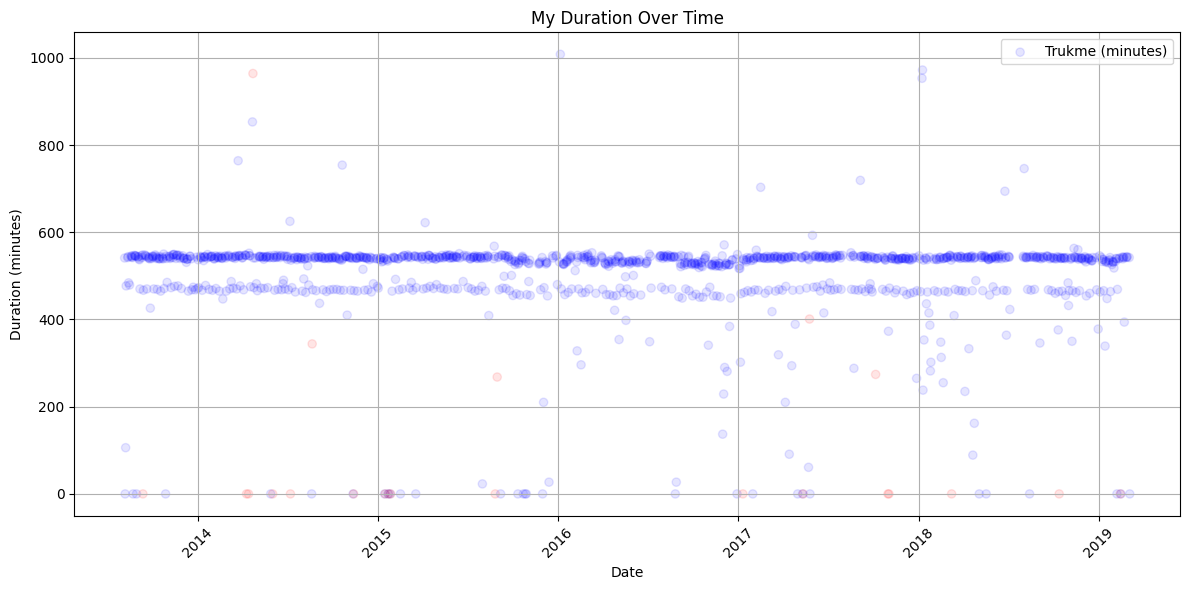

In [ ]:
import matplotlib.pyplot as plt

df["date"] = pd.to_datetime(df["date"])
color_map = {1: "blue", -1: "red", 0: "green"}  # Customize colors as needed
df["color"] = df["INOUT"].map(color_map)
# Plotting the data
plt.figure(figsize=(12, 6))
plt.scatter(df["date"], df["trukme"], marker="o", label="Trukme (minutes)", alpha=0.1, color=df["color"])

# Adding titles and labels
plt.title("My Duration Over Time")
plt.xlabel("Date")
plt.ylabel("Duration (minutes)")
plt.grid(True)
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
sql = """
SELECT
    DataLaikas,
    person,
    ReaderName,
    `Kryptis kodas` AS INOUT
FROM judejimai
WHERE abs(`Kryptis kodas`) != 11 AND `Įvykio kodas` = 1
"""
df_all = pd.read_sql_query(sql, connection)
df_all

,DataLaikas,Person,ReaderName,INOUT
0,2013-08-08 07:42:00,2,Iejimas,1.0
1,2013-08-08 07:42:00,3,Iejimas,1.0
2,2013-08-08 07:42:10,4,Iejimas,1.0
3,2013-08-08 07:42:10,5,Iejimas,1.0
4,2013-08-08 07:42:10,6,Ivaziavimas,1.0
...,...,...,...,...
1780221,2019-02-08 08:34:30,989,Isejimas,-1.0
1780222,2019-02-08 08:34:30,1105,Isejimas,-1.0
1780223,2019-02-08 08:34:30,2187,Isejimas,-1.0
1780224,2019-02-08 08:35:00,958,Isejimas,-1.0


In [5]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780226 entries, 0 to 1780225
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   DataLaikas  object 
 1   Person      int64  
 2   ReaderName  object 
 3   INOUT       float64
dtypes: float64(1), int64(1), object(2)
memory usage: 54.3+ MB


In [6]:
df_all["INOUT"].value_counts()

INOUT
 1.0    951536
-1.0    503909
 0.0    324781
Name: count, dtype: int64

In [7]:
df_all.describe(include="all")

,DataLaikas,Person,ReaderName,INOUT
count,1780226,1.780226e+06,1780226,1.780226e+06
unique,1075063,NaN,34,NaN
top,2015-09-14 08:10:30,NaN,Iejimas,NaN
freq,18,NaN,534129,NaN
mean,NaN,9.372807e+02,NaN,2.514439e-01
std,NaN,7.069505e+02,NaN,8.685265e-01
min,NaN,1.000000e+00,NaN,-1.000000e+00
25%,NaN,3.660000e+02,NaN,-1.000000e+00
50%,NaN,8.120000e+02,NaN,1.000000e+00
75%,NaN,1.328000e+03,NaN,1.000000e+00


In [ ]:
# Convert DataLaikas to datetime
df_all["DataLaikas"] = pd.to_datetime(df_all["DataLaikas"])
df_all["date"] = pd.to_datetime(df_all["DataLaikas"]).dt.date
df_all["time"] = pd.to_datetime(df_all["DataLaikas"]).dt.time

# Convert time to minutes since midnight for plotting
df_all["time_in_minutes"] = df_all["time"].apply(lambda x: x.hour * 60 + x.minute)
color_map = {1: "blue", -1: "red", 0: "green", 100: "cyan"}  # Customize colors as needed
df_all["color"] = df_all["INOUT"].map(color_map)
df_all.loc[df_all["ReaderName"] == "Valgyklos kasa", "color"] = "magenta"
df_all

,DataLaikas,Person,ReaderName,INOUT,date,time,time_in_minutes,color
0,2013-08-08 07:42:00,2,Iejimas,1.0,2013-08-08,07:42:00,462,blue
1,2013-08-08 07:42:00,3,Iejimas,1.0,2013-08-08,07:42:00,462,blue
2,2013-08-08 07:42:10,4,Iejimas,1.0,2013-08-08,07:42:10,462,blue
3,2013-08-08 07:42:10,5,Iejimas,1.0,2013-08-08,07:42:10,462,blue
4,2013-08-08 07:42:10,6,Ivaziavimas,1.0,2013-08-08,07:42:10,462,blue
...,...,...,...,...,...,...,...,...
1780221,2019-02-08 08:34:30,989,Isejimas,-1.0,2019-02-08,08:34:30,514,red
1780222,2019-02-08 08:34:30,1105,Isejimas,-1.0,2019-02-08,08:34:30,514,red
1780223,2019-02-08 08:34:30,2187,Isejimas,-1.0,2019-02-08,08:34:30,514,red
1780224,2019-02-08 08:35:00,958,Isejimas,-1.0,2019-02-08,08:35:00,515,red


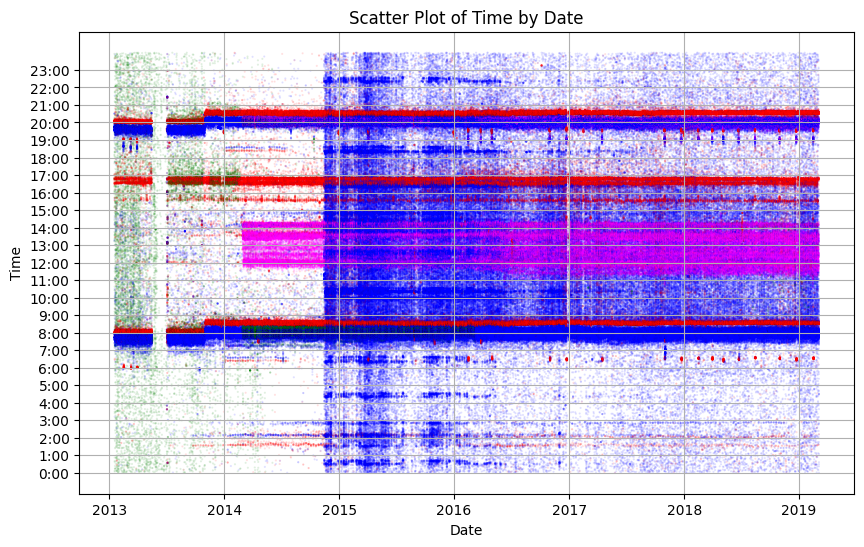

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_all["date"], df_all["time_in_minutes"], alpha=0.1, s=0.333, color=df_all["color"])

# Formatting the y-axis to show time
plt.yticks(ticks=range(0, 1440, 60), labels=[f"{h}:00" for h in range(24)])
# plt.gca().invert_yaxis()  # Invert y-axis to show 00:00 at the bottom
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("Scatter Plot of Time by Date")
plt.grid()

# Show the plot
plt.show()

In [10]:
df_one = df_all[df_all["Person"] == 1560]
df_one

,DataLaikas,Person,ReaderName,INOUT,date,time,time_in_minutes,color
1104,2013-08-08 14:59:50,1560,Iejimas,1.0,2013-08-08,14:59:50,899,blue
1338,2013-08-08 16:46:00,1560,Isejimas,-1.0,2013-08-08,16:46:00,1006,red
5996,2013-08-09 07:44:00,1560,Iejimas,1.0,2013-08-09,07:44:00,464,blue
8465,2013-08-09 15:41:20,1560,Isejimas,-1.0,2013-08-09,15:41:20,941,red
16139,2013-08-12 07:43:00,1560,Iejimas,1.0,2013-08-12,07:43:00,463,blue
...,...,...,...,...,...,...,...,...
1778582,2019-02-06 14:48:50,1560,Iejimas,1.0,2019-02-06,14:48:50,888,blue
1778642,2019-02-06 16:46:30,1560,Isejimas,-1.0,2019-02-06,16:46:30,1006,red
1778983,2019-02-07 07:47:30,1560,Iejimas,1.0,2019-02-07,07:47:30,467,blue
1779485,2019-02-07 12:56:40,1560,Valgyklos kasa,0.0,2019-02-07,12:56:40,776,magenta


In [11]:
df_one.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4612 entries, 1104 to 1779972
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   DataLaikas       4612 non-null   datetime64[ns]
 1   Person           4612 non-null   int64         
 2   ReaderName       4612 non-null   object        
 3   INOUT            4612 non-null   float64       
 4   date             4612 non-null   object        
 5   time             4612 non-null   object        
 6   time_in_minutes  4612 non-null   int64         
 7   color            4612 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 324.3+ KB


In [ ]:
import matplotlib.pyplot as plt
import mplcursors

# Scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_one["date"], df_one["time_in_minutes"], alpha=0.5, s=0.667, color=df_one["color"])

# Formatting the y-axis to show time
plt.yticks(ticks=range(0, 1440, 60), labels=[f"{h}:00" for h in range(24)])
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("Scatter Plot of Time by Date")
plt.grid()
# Add interactivity
mplcursors.cursor(scatter, hover=True)
# Show the plot
plt.show()

ModuleNotFoundError: No module named 'mplcursors'

In [ ]:
df.describe(include="all")

,date,time,INOUT,skirtumas,trukme,count,event,nuo,iki,color
count,1226,1226,1226.000000,1226,1226.000000,1226.000000,1226,1226,1226,1226
unique,NaN,328,NaN,366,NaN,NaN,1194,315,279,2
top,NaN,10:46:10,NaN,+0000-00-00 00:00:00.000,NaN,NaN,19:50:20,10:46:10,20:00:00,blue
freq,NaN,23,NaN,48,NaN,NaN,3,23,30,1204
mean,2016-05-06 01:12:49.331158272,NaN,0.964111,NaN,495.753670,2.845840,NaN,NaN,NaN,NaN
min,2013-08-06 00:00:00,NaN,-1.000000,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN
25%,2014-11-17 06:00:00,NaN,1.000000,NaN,473.250000,2.000000,NaN,NaN,NaN,NaN
50%,2016-05-09 12:00:00,NaN,1.000000,NaN,540.000000,2.000000,NaN,NaN,NaN,NaN
75%,2017-10-09 18:00:00,NaN,1.000000,NaN,543.000000,3.000000,NaN,NaN,NaN,NaN
max,2019-03-05 00:00:00,NaN,1.000000,NaN,1134.000000,34.000000,NaN,NaN,NaN,NaN


In [ ]:
import plotly.express as px

# Create an interactive scatter plot
fig = px.scatter(
    df_one,
    x="date",
    y="time_in_minutes",
    color="color",  # Use your DataFrame's color column
    title="Scatter Plot of Time by Date",
    labels={"time_in_minutes": "Time (in Minutes)", "date": "Date"},
)

# Update y-axis to show time format using lists
fig.update_yaxes(tickvals=list(range(0, 1440, 60)), ticktext=[f"{h}:00" for h in range(24)])

# Show the interactive plot
fig.show()

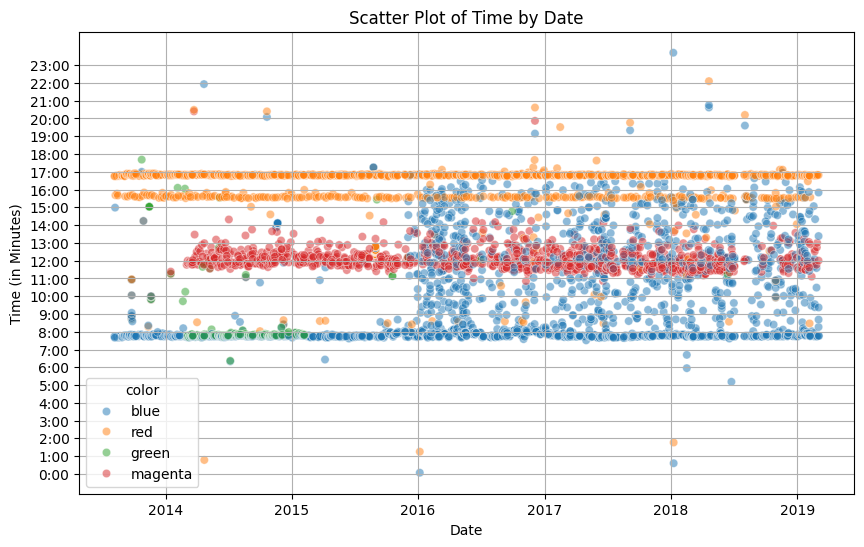

In [ ]:
import seaborn as sns

# Create a scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_one, x="date", y="time_in_minutes", hue="color", alpha=0.5)

# Formatting the y-axis to show time
plt.yticks(ticks=range(0, 1440, 60), labels=[f"{h}:00" for h in range(24)])
plt.xlabel("Date")
plt.ylabel("Time (in Minutes)")
plt.title("Scatter Plot of Time by Date")
plt.grid()

# Show the plot
plt.show()

In [ ]:
df_one.value_counts()

date        time_in_minutes  color
2023-01-01  138              green    1
2023-03-05  763              blue     1
2023-03-15  730              green    1
2023-03-14  323              green    1
2023-03-13  141              green    1
                                     ..
2023-01-31  907              green    1
2023-01-30  1209             blue     1
2023-01-29  468              red      1
2023-01-28  751              blue     1
2023-04-10  928              blue     1
Name: count, Length: 100, dtype: int64

In [ ]:
df_one.shape

(4612, 8)

In [ ]:
connection.close()